In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Total number of images: 10379
Number of images in each class:
0: 280
1: 273
10: 297
11: 243
12: 262
13: 273
14: 288
15: 305
16: 258
17: 266
18: 272
19: 285
2: 252
20: 280
21: 281
22: 293
23: 273
24: 289
25: 286
26: 278
27: 267
28: 274
29: 264
3: 261
30: 279
31: 270
32: 242
33: 296
34: 280
35: 308
36: 277
37: 269
4: 254
5: 254
6: 276
7: 261
8: 259
9: 254


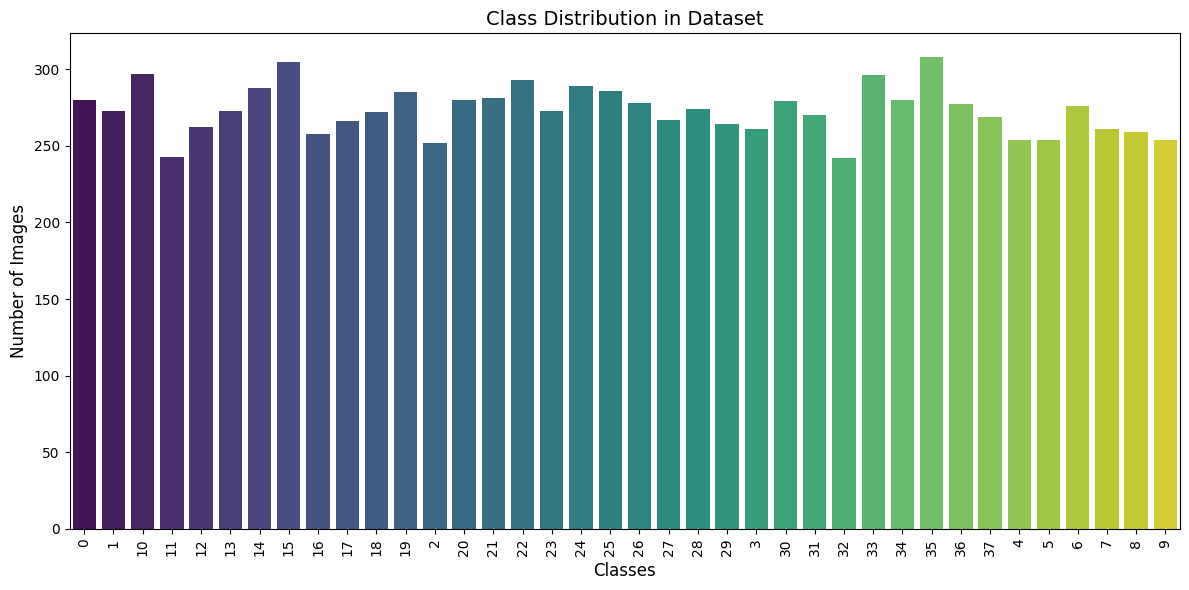

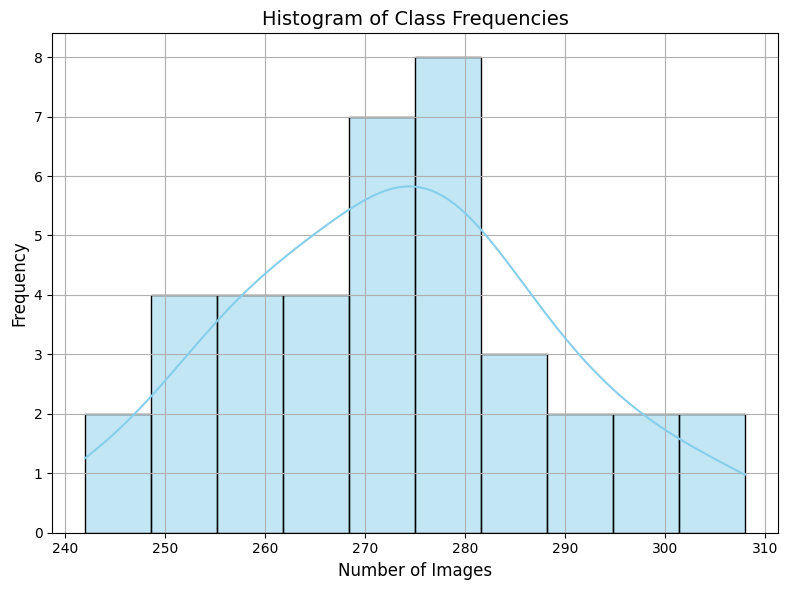

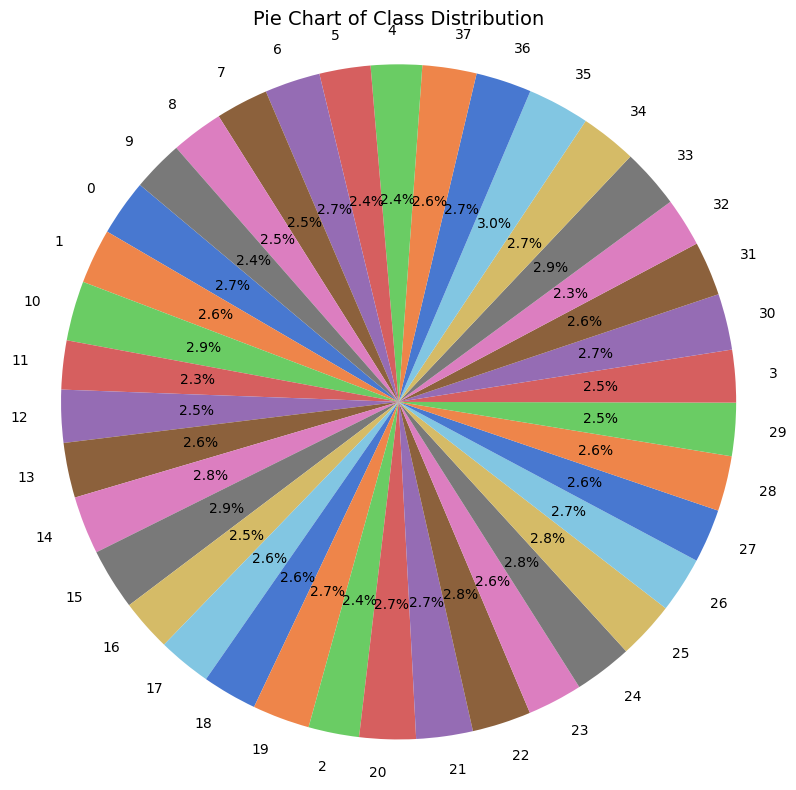

In [11]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Path to your dataset folder
dataset_path = "../dataset/data_old"

# Get list of subfolders (classes)
classes = os.listdir(dataset_path)

# Initialize variables to store dataset statistics
total_images = 0
class_counts = {}

# Iterate through each class folder
for class_folder in classes:
    class_path = os.path.join(dataset_path, class_folder)
    # Count the number of images in the class folder
    num_images = len(os.listdir(class_path))
    total_images += num_images
    class_counts[class_folder] = num_images

# Print dataset statistics
print("Total number of images:", total_images)
print("Number of images in each class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Convert dictionary to DataFrame for plotting
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Plotting class distribution using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Class', y='Count', palette="viridis")
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution in Dataset', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting histogram of class frequencies
plt.figure(figsize=(8, 6))
sns.histplot(df['Count'], bins=10, color='skyblue', edgecolor='black', kde=True)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Class Frequencies', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting pie chart of class distribution
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title('Pie Chart of Class Distribution', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [12]:
import os
import pandas as pd

# Path to your dataset folder
dataset_path = "../dataset/data_old"

# Get list of subfolders (classes)
classes = os.listdir(dataset_path)

# Initialize variables to store dataset statistics
total_images = 0
class_counts = {}
image_formats = set()

# Iterate through each class folder
for class_folder in classes:
    class_path = os.path.join(dataset_path, class_folder)
    # Count the number of images in the class folder
    num_images = len(os.listdir(class_path))
    total_images += num_images
    class_counts[class_folder] = num_images

    # Extract file formats/types of the images
    for image_file in os.listdir(class_path):
        _, file_extension = os.path.splitext(image_file)
        image_formats.add(file_extension)

# Number of classes
num_classes = len(class_counts)

# Average number of images per class
avg_images_per_class = total_images / num_classes

# Total size of the dataset
total_size_bytes = sum(os.path.getsize(os.path.join(dataset_path, f)) for f in os.listdir(dataset_path))
total_size_mb = total_size_bytes / (1024 * 1024)

# Print dataset statistics
print("Dataset Information:")
print("Total number of classes:", num_classes)
print("Total number of images:", total_images)
print("Average number of images per class:", avg_images_per_class)
print("Total size of the dataset: {:.2f} MB".format(total_size_mb))
print("Image formats/types:", ", ".join(image_formats))

# Print number of images in each class
print("\nNumber of images in each class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Distribution of the number of images across classes
print("\nDistribution of the number of images across classes:")
for class_name, count in class_counts.items():
    print(f"{count} classes have {class_name} images")


Dataset Information:
Total number of classes: 38
Total number of images: 10379
Average number of images per class: 273.13157894736844
Total size of the dataset: 2.61 MB
Image formats/types: .jpg

Number of images in each class:
0: 280
1: 273
10: 297
11: 243
12: 262
13: 273
14: 288
15: 305
16: 258
17: 266
18: 272
19: 285
2: 252
20: 280
21: 281
22: 293
23: 273
24: 289
25: 286
26: 278
27: 267
28: 274
29: 264
3: 261
30: 279
31: 270
32: 242
33: 296
34: 280
35: 308
36: 277
37: 269
4: 254
5: 254
6: 276
7: 261
8: 259
9: 254

Distribution of the number of images across classes:
280 classes have 0 images
273 classes have 1 images
297 classes have 10 images
243 classes have 11 images
262 classes have 12 images
273 classes have 13 images
288 classes have 14 images
305 classes have 15 images
258 classes have 16 images
266 classes have 17 images
272 classes have 18 images
285 classes have 19 images
252 classes have 2 images
280 classes have 20 images
281 classes have 21 images
293 classes have 22 im

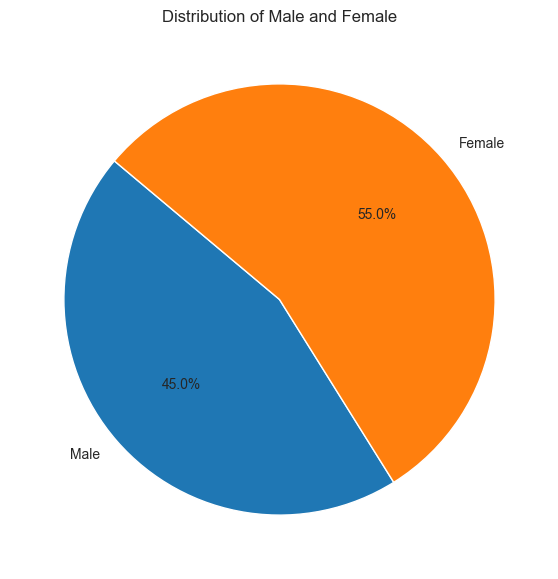

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_pie_plot(male_count, female_count):
    # Data to plot
    sizes = [male_count, female_count]
    labels = ['Male', 'Female']

    # Plot
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Male and Female')

    # Use Seaborn's style
    sns.set_style("whitegrid")

    plt.show()

# Example usage
male_count = 45
female_count = 55

generate_pie_plot(male_count, female_count)

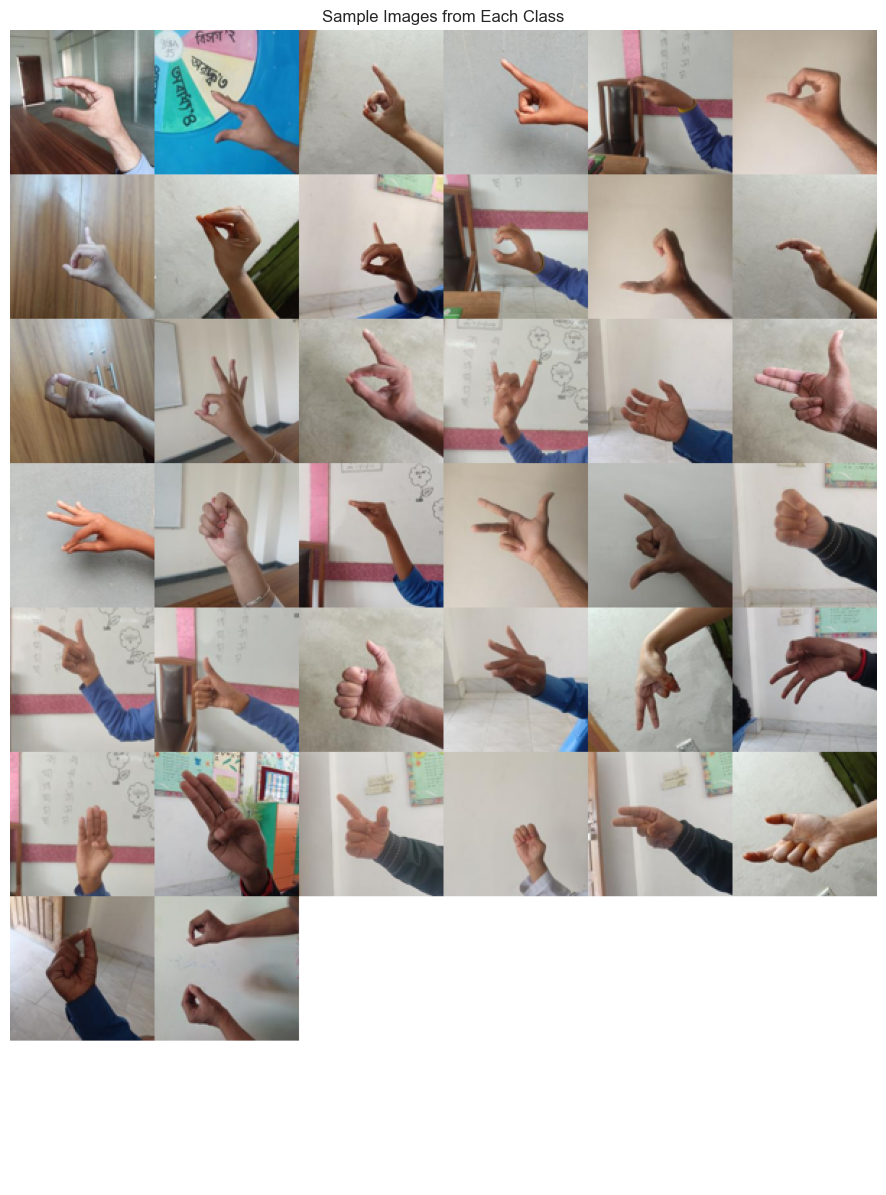

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Get list of subfolders (classes) and sort them numerically
classes = sorted(os.listdir(dataset_path), key=int)

# Set the number of samples to visualize from each class
num_samples_per_class = 1

# Initialize a list to store sampled images
sampled_images = []

# Iterate through each class folder
for class_folder in classes:
    class_path = os.path.join(dataset_path, class_folder)
    # Get a list of image files in the class folder
    image_files = os.listdir(class_path)
    # Choose random images from the class
    sampled_images.extend([os.path.join(class_path, img) for img in random.sample(image_files, num_samples_per_class)])

# Create a new blank image for the collage
collage_width = 6  # Number of images per row
collage_height = (len(classes) // collage_width) + (len(classes) % collage_width)
collage_size = (collage_width * 100, collage_height * 100)  # Size of each image cell in the collage
collage = Image.new('RGB', collage_size, color='white')

# Paste sampled images onto the collage
for i, img_path in enumerate(sampled_images):
    img = Image.open(img_path)
    img.thumbnail((100, 100))
    x = (i % collage_width) * 100
    y = (i // collage_width) * 100
    collage.paste(img, (x, y))

# Display the collage
plt.figure(figsize=(15, 15))
plt.imshow(collage)
plt.axis('off')
plt.title('Sample Images from Each Class')
plt.show()